## AND Gate  with Keras

* 1학기때 SVM 을 이용해서 분류했던 예를 신경망 구조로 해결하는 방법입니다.

참고 : https://github.com/dalek7/Undergrad-AI-2020SPring/blob/master/05_SVM_simple.ipynb

In [ ]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.4.0'

In [ ]:
# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_data = np.array([[1, 2], [1, 5], [2, 2], [3, 3.5], [7, 5], [9, 4], [8, 2]]) #training_points
y_data = [1, 1, 1, 1, 0, 0, 0]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

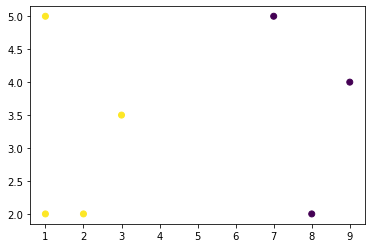

In [ ]:
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Dense(2, input_dim=2))
model.add(layers.Activation('tanh'))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

In [ ]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


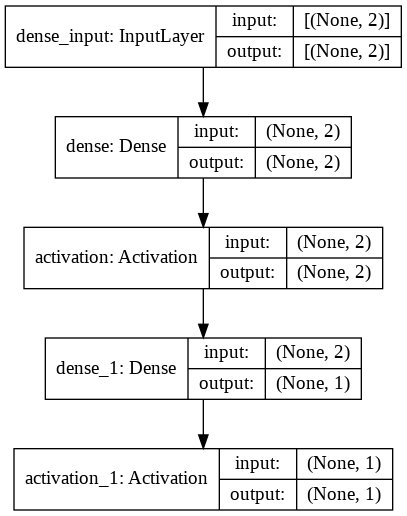

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_and.png', show_shapes=True)

In [ ]:
history = model.fit(x_data, y_data,  batch_size=1, epochs=500)

Epoch 1/500
7/7 [==============================] - 1s 1ms/step - loss: 0.8198 - accuracy: 0.5095
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7245 - accuracy: 0.5887
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7832 - accuracy: 0.3908
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7112 - accuracy: 0.5887
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.6762
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7543 - accuracy: 0.2051
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7117 - accuracy: 0.5470
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6564 - accuracy: 0.7074
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.6137
Epoch 10/500
7/7 [==============================] - 0s 2ms/step - loss: 0.7254 - accuracy: 0.2467
Epoch 11/500
7/7 [===========

### 학습 결과 그려보기

Text(0.5, 0, 'epoch')

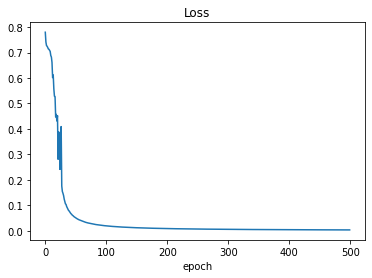

In [ ]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

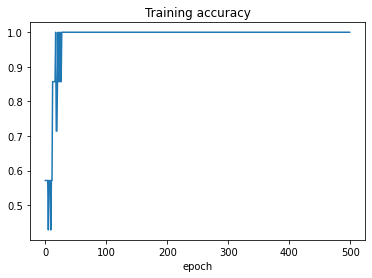

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('epoch')

###  확률 찍어보기

In [ ]:
hypothesis = model.predict(x_data)
print(hypothesis)

[[0.9977864 ]
 [0.9978372 ]
 [0.99617636]
 [0.9975188 ]
 [0.00412911]
 [0.00331652]
 [0.00331658]]


In [ ]:
predicted = hypothesis > 0.5
print(predicted)

[[ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]]
